# Bank suscription rates - log reg model

In diese klein projekt we will predict if a client would subscribe to a bank's service using other known values such as:

Interest rate (float)
Credit (bool value)
Previous subscription (bool value)
Duration of phone call (seconds)
Called on may (bool value)
Called on march (bool value)

We will preprocess the data, find the best fit for the model and then test it with unseen data.


## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
raw_data.describe(include = 'all') 
#Note that there is a column with yes/no and another one with 6 values instead of only 2 (0,1)

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
t_data = raw_data.copy() #we create a new DF to leave raw_data unchanged
t_data['may'] = t_data['may'].replace([2,3,4,5],1) #Replace all numbers different from 0 to 1 

In [5]:
#We now change yes/no values for 1/0
t_data['y'] = t_data['y'].map({'yes':1,'no':0})
t_data['y']

0      0
1      1
2      0
3      1
4      0
      ..
513    0
514    1
515    0
516    1
517    0
Name: y, Length: 518, dtype: int64

In [6]:
data = t_data.drop(['Unnamed: 0'], axis = 1) #Drop 'Unnamed: 0' because it was just an index

Text(0, 0.5, 'Suscription')

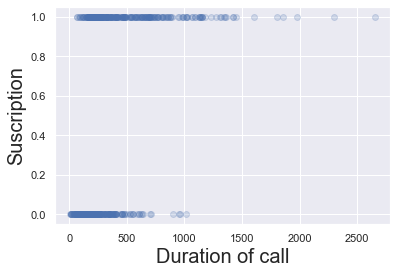

In [28]:
#Plot duration and 'y' to see if there's a trend
plt.scatter(data['duration'], data['y'], alpha = 0.2)
#Labeling
plt.xlabel('Duration of call', size = 20)
plt.ylabel('Suscription', size = 20)


We note that there's a high probability for clients to subscribe if the spend mor than 1000 seconds on the call. Nonetheless, the majority of the values are on the same range of duration, that means that there are more variables that can help us describe the rate of subscription. 

### Declare the dependent and independent variables

In [7]:
#Dependent variable
inputs = data['y'] 

#Independent variables, all but inputs
targets = data.drop(['y'],axis = 1)

### Multi variable Logistic Regression

In [8]:
targets_x1 = sm.add_constant(targets) # We add a column of a constant value
log_reg = sm.Logit(inputs,targets_x1) # Declare inputs and targets for the log reg model
log_reg_results = log_reg.fit() #Fit values and find the best model

Optimization terminated successfully.
         Current function value: 0.335824
         Iterations 7


In [10]:
log_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.5155
Time:                        16:25:51   Log-Likelihood:                -173.96
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.136e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1317      0.353      0.373      0.709      -0.561       0.824
interest_rate    -0.8267      0.095     -8.736      0.000      -1.012      -0.641
credit            2.3249      1.089      2.135      0.033       0.190       4.459
march            -1.8651      0.332     -5.611      0.000      -2.517      -1.214
may              -0.3628      0.389     -0.932      0.351      -1.126       0.400
previous          1.7903      0.570      3.139      0.002       0.672       2.908
duration          0.0069      0.001      9.370      0.000       0.005       0.008
=================================================================================
"""

We note that: 
* The pseudo R^2 is higher than the target range ( 0.2 - 0.4 ) which could lead to a not-so-good prediction.  
* The LLR p-val is extremely low, with that value, we can deny H0. That means, evidence shows that there's a relationship between out input and our targets column. 
* The P-Val from 'may' column is higher than 0.05, therefore, we could get rid of it. 

In [12]:
#Dependent values are kept as before on inputs var
#Declare the new independent values DF
targets_1 = data.drop(['y','may'], axis = 1)


In [14]:
targets_1_x1 = sm.add_constant(targets_1) # We add a column of a constant value
log_reg_1 = sm.Logit(inputs,targets_1_x1) # Declare inputs and targets for the log reg model
log_reg_results_1 = log_reg_1.fit() #Fit values and find the best model

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [17]:
log_reg_results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.5143
Time:                        17:02:28   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

In [30]:
def confusion_matrix(data,actual_values,model):
        """
        Confusion matrix 
        
        # Parameters
        # ----------
        #data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
            """
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [35]:
confusion_matrix(targets_1_x1,inputs,log_reg_results_1)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

We find an accurracy for the trained model with the original input data of 86.29%. 
Now we are going to test the model with new values.

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [41]:
new_raw_data = pd.read_csv('Bank-data-testing.csv')
new_raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [44]:
#create a new var called t_data_2
t_data_2 = new_raw_data.copy()
t_data_2['y'] = t_data_2['y'].map({'yes':1,'no':0})


In [45]:
test_data = t_data_2.drop(['Unnamed: 0','may'], axis = 1)
test_data.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [46]:
#Dependent values
inputs_test = test_data['y']

#Indep. values
targets_test1 = test_data.drop(['y'], axis = 1)
targets_test = sm.add_constant(targets_test1)


Determine the confusion matrix for the new set of data.

In [47]:
confusion_matrix(targets_test,inputs_test,log_reg_results_1)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

The accuracy of the model with data it has never seen before is 86.03%, compared with 86.29% there's almost no difference and our model fits well to the data provided. 

## Conclusion

We developed a logistic regression model that could help us predict if a client could subscribe to the bank's services knowing variables such as: Interest rate, duration of the call, if the client has signed up before, if he was called on the previous month and his credit. 

We also developed a matrix that delivers the accurracy of the Logistic regression model comparing the actual data with the predicted. The test data showed that our model could fit succesfully to new data. 
